In [1]:
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = datasets.load_iris(return_X_y=True)

In [3]:
import sklearn.decomposition as decomposition
import sklearn.preprocessing as preprocessing

In [4]:
pca = decomposition.PCA()
pca.fit(X)

PCA()

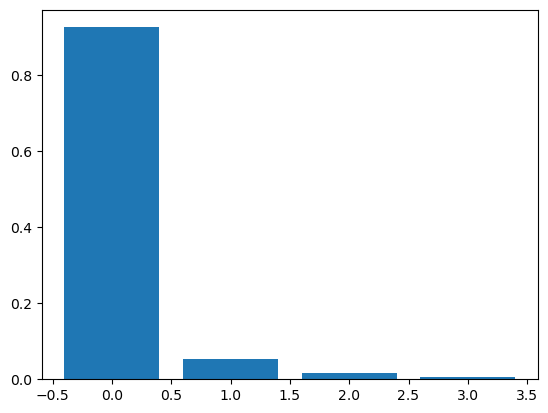

In [5]:
plt.bar(range(4), pca.explained_variance_ratio_)
plt.show()

In [6]:
U = pca.transform(X)
U = U[:,:2]

In [7]:
U2 = U[Y != 0]
Y2 = Y[Y != 0]

In [8]:
np.putmask(Y2, Y2 == 1, -1)
np.putmask(Y2, Y2 == 2, +1)

In [9]:
Y2 = Y2.astype('d')

In [10]:
U2 = preprocessing.scale(U2)

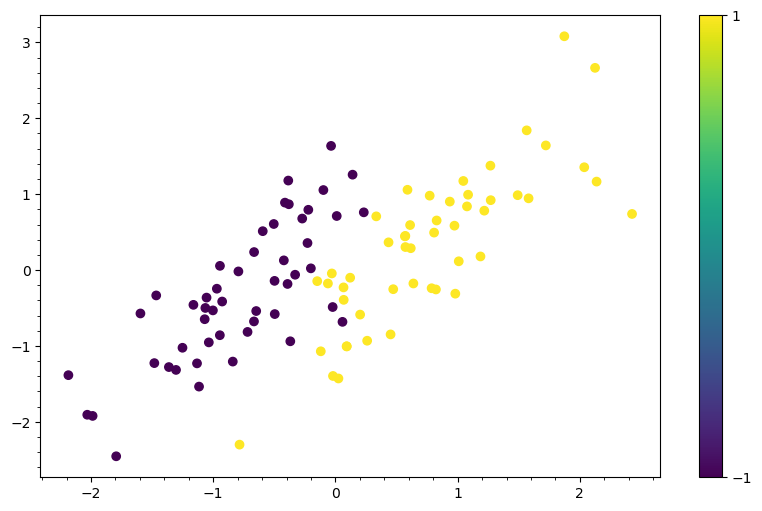

In [11]:
plt.figure(figsize=(10,6))
sc = plt.scatter(U2[:,0], U2[:,1], c=Y2)
plt.colorbar(sc,ticks=[-1,+1])
plt.minorticks_on()
plt.show()

In [12]:
import mlgrad.func as func
import mlgrad.model as model
from mlgrad.cls import classification_as_regr

In [13]:
body = model.FFNetworkModel()
layer = model.SigmaNeuronModelLayer(func.Sigmoidal(7.0), 2, 30)
body.add(layer)
head = model.LinearModel(body.n_output)
nnmod = model.FFNetworkFuncModel(head, body)

nnmod.allocate()
nnmod.param = np.random.random(nnmod.n_param)

In [14]:
alg = classification_as_regr(U2, Y2, nnmod)

In [15]:
np.asarray(nnmod.param)

array([3.19814648e-01, 7.04461363e-02, 2.37512450e-02, 2.65984763e-01,
       4.67307437e-01, 9.03218926e-01, 4.03807096e-01, 4.61114977e-01,
       4.18621760e-01, 4.47261131e-01, 7.00058096e-01, 9.69207314e-01,
       5.50842207e-01, 3.49411579e-01, 7.73473438e-01, 7.35098606e-01,
       4.20072686e-01, 2.40156114e-01, 9.54029036e-01, 9.16353144e-01,
       3.25968093e-02, 5.99826028e-01, 6.75630303e-01, 3.30866043e-01,
       1.81805551e-01, 8.36105580e-01, 5.56322990e-01, 6.12634397e-01,
       2.38470842e-01, 9.37360042e-01, 4.28329352e-01, 8.93583274e-01,
       2.32139804e-01, 1.51464638e-01, 4.84108000e-01, 9.36529023e-01,
       7.48440538e-01, 5.60255109e-01, 6.60232445e-01, 3.87673989e-01,
       7.18994040e-01, 2.62957057e-01, 2.95078661e-02, 7.63900534e-02,
       1.71885108e-01, 3.75972919e-01, 1.84026695e-01, 2.11861171e-01,
       6.60266834e-01, 8.01447439e-02, 4.40005691e-01, 7.72142228e-01,
       8.05487598e-01, 1.50590971e-01, 7.80762059e-01, 9.18406238e-01,
      

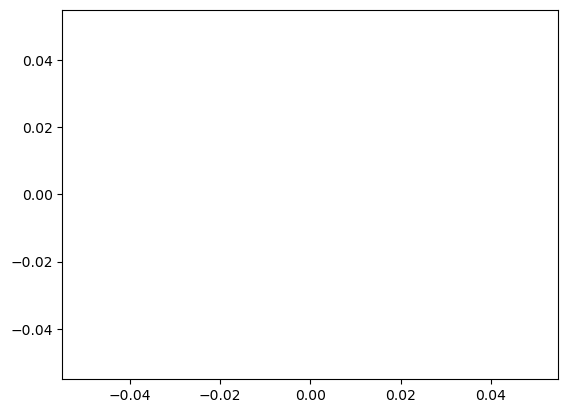

In [16]:
plt.plot(alg.lvals)
plt.show()

In [17]:
def calc_zz(mod, min_val, max_val):
    xrange = np.linspace(min_val, max_val, 100)
    yrange = np.linspace(min_val, max_val, 100)
    XX, YY = np.meshgrid(xrange, yrange)
    XY = np.c_[XX.ravel(), YY.ravel()]
    ZZ = mod.evaluate_all(XY)
    ZZ = ZZ.reshape(XX.shape)
    return ZZ

/tmp/ipykernel_39032/3432412594.py:6: UserWarning: No contour levels were found within the data range.
  plt.contour(ZZ, levels=[-0.5,0.,0.5], origin='lower', extent=(-3.5, 3.5,-3.5, 3.5), linewidth=1)
/tmp/ipykernel_39032/3432412594.py:6: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(ZZ, levels=[-0.5,0.,0.5], origin='lower', extent=(-3.5, 3.5,-3.5, 3.5), linewidth=1)


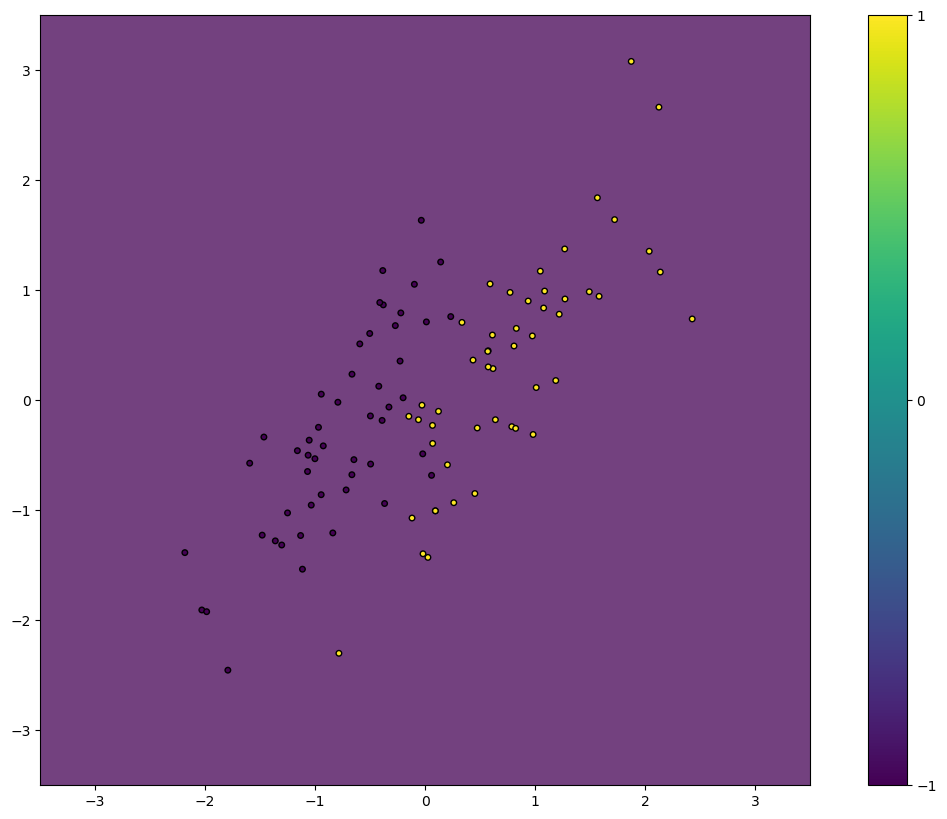

In [18]:
ZZ = calc_zz(nnmod, -3.5, 3.5)
plt.figure(figsize=(15,10))
cs = plt.scatter(U2[:,0], U2[:,1], c=Y2, edgecolors='k', s=16)
plt.imshow(ZZ, origin='lower', extent=(-3.5, 3.5,-3.5, 3.5), alpha=0.75)
plt.colorbar(cs, ticks=[-1,0,1])
plt.contour(ZZ, levels=[-0.5,0.,0.5], origin='lower', extent=(-3.5, 3.5,-3.5, 3.5), linewidth=1)
# plt.xlim(-2,2)
# plt.ylim(-2,2)
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(Y2, np.sign(nnmod.evaluate_all(U2)))

0.0